# Ian Murphy 
# 11/13/2020
# BrainStation

# Data Extraction, Data Cleaning, First Model, Feature Engineering

### Question: What factors and statistics have the most impact on if a team makes the NBA Playoffs? 

In this notebook I am going to extract all the data I need for the project as well as do some cleaning and run a logistic regression model to see how it performs initially. 

I am going to get the Player Efficiency Rating and the True Shooting Percentage for the top 12 players on each team (top 12 is determined by minutes per game).

On the team level I am going to get stats for pace, relative pace, offensive rating(ORtg), relative ORtg, defensive rating(DRtg), relative DRtg and coach. 

My dependent variable will be if that team made the playoffs that year. Each data point will be a specific team and year. 

In [1]:
# importing what I need to do the project
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests

### Data Dictionary

This cell contains a Data Dictionary containing the description for every feature the the dataframe called 'outcomes_df':

PER: This stands for Player Efficiency Rating. This is a measure of a player's per-minute productivity. It takes into account all of the positive things a player does, and creates a metric to measure how productive that player is. It is mean to summarize a player's statistical accomplishments in a single number. 

TSP: This stands for True Shooting Percentage. True shooting percentage is a measure of shooting efficiency that takes into account 2 point field goals, 3-point field goals, and free throws. 

PER and TSP will be included for the top 12 players on each team. (top 12 by minutes played per game). For example Player1_PER is the PER for the player on that team that played the most minutes per game that season. 

AVG_PER: This is the average Player Efficiency Rating of the top 12 players on each team. 

AVG_TSP: This is the average True Shooting Percentage of the top 12 players on each team. 

Coaches: I will be using dummy variables for coaches. The column titles will be the first initial, and then the last name the coach for each respective season. If the value is 1 then that means that respective coach was the coach of that team that season. If the value is 0, then that coach was not coaching that team, that season. 

ORtg: This stands for Offensive Rating. It is points scored per 100 possessions by a team. 

Rel ORtg:This is similar to ORtg, but it is relative to the league average. 

DRtg: This stands for Defensive Rating. It is the amount of points allowed per 100 posessions by a team.

Rel DRtg: This is similar to DRtg, but it is relative to the league average. 

SRS: This stands for Simple Rating System. This rating takes into account average point differential and strength of schedule. The rating is denominated in points above or below the average, where zero is average. 

Pace: The Pace factor is an estimate of the number of possessions per 48 minutes by a team. 

Rel Pace: This is similar to Pace, but it is relative to the league average. 

Playoffs: This is the target variable. 0 means the team did not make the playoffs that year. 1 Means the team did make the playoffs that year. 

In [2]:
# creating empy urls list so I can append the urls
urls = []

# adding all abreviations for the teams so I can put together the urls 
# some of the teams have a few different abbreviations depending on year 
teams = ['NYK', 'TOR', 'BOS', 'BRK', 'NJN', 'PHI', 'MIL', 'IND', 'CHI', 'DET', 'CLE', 'CHO', 'CHA', 'CHH', 'MIA', 'ORL', 'WAS','WSB', 'ATL',
         'DEN', 'UTA', 'POR', 'MIN', 'LAL', 'LAC', 'PHO', 'SAC', 'GSW', 'HOU', 'DAL', 'MEM','VAN', 'SAS', 'OKC', 'SEA', 
         'NOP', 'NOK', 'NOH']

# 30 years
years = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 
         2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

df_list = list()

for team in teams:
    for year in reversed(years): 
        urls.append(f'https://www.basketball-reference.com/teams/{team}/{year}.html')   


In [3]:
# create empty data frame so I can concat all the dataframes i pull out of the urls
final_df = pd.DataFrame()

# for each url 
for url in urls: 
    r = requests.get(url).content
    try: 
        tables = pd.read_html(r)
        advanced_stats = tables[2] # pulling advanced stats table 
        PER = advanced_stats.iloc[:12, 5] # single out PER
        TSP = advanced_stats.iloc[:12, 6] # single out TSP
        df = pd.concat([PER, TSP], axis = 0) # add together 
        df1 = pd.DataFrame(data = df, columns = [url]).transpose() # create dataframe flip it
        df1.columns = ['player1_PER', 'player2_PER', 'player3_PER', 'player4_PER', 'player5_PER', 'player6_PER', 
                       'player7_PER', 'player8_PER', 'player9_PER', 'player10_PER', 'playe11_PER', 'player12_PER', 
                       'player1_TSP', 'player2_TSP', 'player3_TSP', 'player4_TSP', 'player5_TSP', 'player6_TSP', 
                       'player7_TSP', 'player8_TSP', 'player9_TSP', 'player10_TSP', 'player11_TSP', 'player12_TSP']
       
        
        # now add all the dataframes together 
        final_df = pd.concat([final_df,df1], axis = 0) 
    
    # except, show the urls that dont work  
    except:
    
        print(f'Something went wrong with {url}')


final_df 

Something went wrong with https://www.basketball-reference.com/teams/TOR/1995.html
Something went wrong with https://www.basketball-reference.com/teams/TOR/1994.html
Something went wrong with https://www.basketball-reference.com/teams/TOR/1993.html
Something went wrong with https://www.basketball-reference.com/teams/TOR/1992.html
Something went wrong with https://www.basketball-reference.com/teams/TOR/1991.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2012.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2011.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2010.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2009.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2008.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2007.html
Something went wrong with https://www.basketball-reference.com/teams/BRK/2006.html
Some

Something went wrong with https://www.basketball-reference.com/teams/WAS/1994.html
Something went wrong with https://www.basketball-reference.com/teams/WAS/1993.html
Something went wrong with https://www.basketball-reference.com/teams/WAS/1992.html
Something went wrong with https://www.basketball-reference.com/teams/WAS/1991.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2020.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2019.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2018.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2017.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2016.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2015.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2014.html
Something went wrong with https://www.basketball-reference.com/teams/WSB/2013.html
Some

Something went wrong with https://www.basketball-reference.com/teams/NOP/2006.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/2005.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/2004.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/2003.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/2002.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/2001.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/2000.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/1999.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/1998.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/1997.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/1996.html
Something went wrong with https://www.basketball-reference.com/teams/NOP/1995.html
Some

,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,player10_PER,...,player3_TSP,player4_TSP,player5_TSP,player6_TSP,player7_TSP,player8_TSP,player9_TSP,player10_TSP,player11_TSP,player12_TSP
https://www.basketball-reference.com/teams/NYK/2020.html,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,10.9,...,0.726,0.530,0.582,0.470,0.497,0.470,0.610,0.527,0.502,0.509
https://www.basketball-reference.com/teams/NYK/2019.html,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,6.0,...,0.561,0.531,0.531,0.564,0.692,0.497,0.585,0.417,0.531,0.482
https://www.basketball-reference.com/teams/NYK/2018.html,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,9.9,...,0.630,0.437,0.556,0.539,0.489,0.625,0.513,0.562,0.563,0.428
https://www.basketball-reference.com/teams/NYK/2017.html,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,15.2,...,0.546,0.530,0.549,0.508,0.564,0.552,0.533,0.491,0.516,0.456
https://www.basketball-reference.com/teams/NYK/2016.html,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,11.1,...,0.574,0.518,0.490,0.571,0.550,0.557,0.479,0.503,0.520,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.basketball-reference.com/teams/NOH/2009.html,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,12.6,...,0.541,0.568,0.531,0.581,0.585,0.459,0.521,0.479,0.531,0.499
https://www.basketball-reference.com/teams/NOH/2008.html,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,9.9,...,0.632,0.581,0.549,0.468,0.512,0.460,0.498,0.505,0.581,0.491
https://www.basketball-reference.com/teams/NOH/2005.html,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,7.1,...,0.511,0.478,0.581,0.537,0.543,0.481,0.412,0.447,0.480,0.460
https://www.basketball-reference.com/teams/NOH/2004.html,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,11.8,...,0.492,0.525,0.483,0.472,0.486,0.527,0.519,0.543,0.457,0.398


In [4]:
# checking results of final_df
final_df

,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,player10_PER,...,player3_TSP,player4_TSP,player5_TSP,player6_TSP,player7_TSP,player8_TSP,player9_TSP,player10_TSP,player11_TSP,player12_TSP
https://www.basketball-reference.com/teams/NYK/2020.html,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,10.9,...,0.726,0.530,0.582,0.470,0.497,0.470,0.610,0.527,0.502,0.509
https://www.basketball-reference.com/teams/NYK/2019.html,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,6.0,...,0.561,0.531,0.531,0.564,0.692,0.497,0.585,0.417,0.531,0.482
https://www.basketball-reference.com/teams/NYK/2018.html,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,9.9,...,0.630,0.437,0.556,0.539,0.489,0.625,0.513,0.562,0.563,0.428
https://www.basketball-reference.com/teams/NYK/2017.html,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,15.2,...,0.546,0.530,0.549,0.508,0.564,0.552,0.533,0.491,0.516,0.456
https://www.basketball-reference.com/teams/NYK/2016.html,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,11.1,...,0.574,0.518,0.490,0.571,0.550,0.557,0.479,0.503,0.520,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.basketball-reference.com/teams/NOH/2009.html,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,12.6,...,0.541,0.568,0.531,0.581,0.585,0.459,0.521,0.479,0.531,0.499
https://www.basketball-reference.com/teams/NOH/2008.html,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,9.9,...,0.632,0.581,0.549,0.468,0.512,0.460,0.498,0.505,0.581,0.491
https://www.basketball-reference.com/teams/NOH/2005.html,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,7.1,...,0.511,0.478,0.581,0.537,0.543,0.481,0.412,0.447,0.480,0.460
https://www.basketball-reference.com/teams/NOH/2004.html,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,11.8,...,0.492,0.525,0.483,0.472,0.486,0.527,0.519,0.543,0.457,0.398


In [5]:
# stripping the indexes to make it more readable and put it in 'Team/Year' format 
final_df.index = final_df.index.str.strip('https://www.basketball-reference.com/teams/')

In [6]:
# create new index
final_df = final_df.reset_index()
final_df

,index,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,player3_TSP,player4_TSP,player5_TSP,player6_TSP,player7_TSP,player8_TSP,player9_TSP,player10_TSP,player11_TSP,player12_TSP
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,0.726,0.530,0.582,0.470,0.497,0.470,0.610,0.527,0.502,0.509
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,0.561,0.531,0.531,0.564,0.692,0.497,0.585,0.417,0.531,0.482
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,0.630,0.437,0.556,0.539,0.489,0.625,0.513,0.562,0.563,0.428
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,0.546,0.530,0.549,0.508,0.564,0.552,0.533,0.491,0.516,0.456
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,0.574,0.518,0.490,0.571,0.550,0.557,0.479,0.503,0.520,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,0.541,0.568,0.531,0.581,0.585,0.459,0.521,0.479,0.531,0.499
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,0.632,0.581,0.549,0.468,0.512,0.460,0.498,0.505,0.581,0.491
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,0.511,0.478,0.581,0.537,0.543,0.481,0.412,0.447,0.480,0.460
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,0.492,0.525,0.483,0.472,0.486,0.527,0.519,0.543,0.457,0.398


In [7]:
# rename the team/year column 
final_df = final_df.rename(columns = {'index' : 'Team/Year'})
final_df.head()

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,player3_TSP,player4_TSP,player5_TSP,player6_TSP,player7_TSP,player8_TSP,player9_TSP,player10_TSP,player11_TSP,player12_TSP
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,0.726,0.530,0.582,0.470,0.497,0.470,0.610,0.527,0.502,0.509
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,0.561,0.531,0.531,0.564,0.692,0.497,0.585,0.417,0.531,0.482
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,0.630,0.437,0.556,0.539,0.489,0.625,0.513,0.562,0.563,0.428
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,0.546,0.530,0.549,0.508,0.564,0.552,0.533,0.491,0.516,0.456
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,0.574,0.518,0.490,0.571,0.550,0.557,0.479,0.503,0.520,0.435


In [8]:
# creating the team_URLs so I can get the playoff results. AKA my target 
team_URLs = []

for team in teams:
    team_URLs.append(f'https://www.basketball-reference.com/teams/{team}/')

team_URLs
# some of these wont work because I used team list from above, but It still will get all 30 teams in correct order 
# I will use try and except in cell below to make this work 

['https://www.basketball-reference.com/teams/NYK/',
 'https://www.basketball-reference.com/teams/TOR/',
 'https://www.basketball-reference.com/teams/BOS/',
 'https://www.basketball-reference.com/teams/BRK/',
 'https://www.basketball-reference.com/teams/NJN/',
 'https://www.basketball-reference.com/teams/PHI/',
 'https://www.basketball-reference.com/teams/MIL/',
 'https://www.basketball-reference.com/teams/IND/',
 'https://www.basketball-reference.com/teams/CHI/',
 'https://www.basketball-reference.com/teams/DET/',
 'https://www.basketball-reference.com/teams/CLE/',
 'https://www.basketball-reference.com/teams/CHO/',
 'https://www.basketball-reference.com/teams/CHA/',
 'https://www.basketball-reference.com/teams/CHH/',
 'https://www.basketball-reference.com/teams/MIA/',
 'https://www.basketball-reference.com/teams/ORL/',
 'https://www.basketball-reference.com/teams/WAS/',
 'https://www.basketball-reference.com/teams/WSB/',
 'https://www.basketball-reference.com/teams/ATL/',
 'https://ww

In [9]:
# empty dataframe 
team_df = pd.DataFrame()

# this loop will concat all teams results together
for url in team_URLs:
    try:
        r = requests.get(url).content
        team_stats = pd.read_html(r)
        table = team_stats[0]
        team_table = table.iloc[1:31, :18] #pulling out the info i need
        team_table['Playoffs'] = team_table['Playoffs'].fillna(0) # filling NaNs with 0, becasue NaN means no playoffs
        team_table['Playoffs'] = np.where(team_table['Playoffs'] == 0, 0, 1) # now changing all non 0 to 1 
        team_df = pd.concat([team_df, team_table], axis = 0) # concat all dataframes together 
    except: 
        print(f'something went wrong with {url}')
        
team_df

something went wrong with https://www.basketball-reference.com/teams/BRK/
something went wrong with https://www.basketball-reference.com/teams/CHO/
something went wrong with https://www.basketball-reference.com/teams/CHH/
something went wrong with https://www.basketball-reference.com/teams/WSB/
something went wrong with https://www.basketball-reference.com/teams/VAN/
something went wrong with https://www.basketball-reference.com/teams/SEA/
something went wrong with https://www.basketball-reference.com/teams/NOP/
something went wrong with https://www.basketball-reference.com/teams/NOK/


,Season,Lg,Team,W,L,W/L%,Finish,SRS,Unnamed: 8,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Unnamed: 15,Playoffs,Coaches
1,2019-20,NBA,New York Knicks,21,45,0.318,5th of 5,-6.72,NaN,98.6,-1.7,106.5,-4.1,113.0,2.4,NaN,0,"D. Fizdale (4-18), M. Miller (17-27)"
2,2018-19,NBA,New York Knicks,17,65,0.207,5th of 5,-8.93,NaN,99.6,-0.4,104.5,-5.9,113.7,3.3,NaN,0,D. Fizdale (17-65)
3,2017-18,NBA,New York Knicks,29,53,0.354,4th of 5,-3.53,NaN,96.8,-0.5,107.1,-1.5,110.7,2.1,NaN,0,J. Hornacek (29-53)
4,2016-17,NBA,New York Knicks,31,51,0.378,3rd of 5,-3.87,NaN,96.0,-0.4,107.7,-1.1,111.5,2.7,NaN,0,J. Hornacek (31-51)
5,2015-16,NBA,New York Knicks,32,50,0.390,3rd of 5,-2.74,NaN,93.4,-2.4,104.6,-1.8,107.6,1.2,NaN,0,"D. Fisher (23-31), K. Rambis (9-19)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2006-07,NBA,New Orleans/Oklahoma City Hornets,39,43,0.476,4th of 5,-1.19,NaN,90.2,-1.7,104.8,-1.7,106.5,0.0,NaN,0,B. Scott (39-43)
15,2005-06,NBA,New Orleans/Oklahoma City Hornets,38,44,0.463,4th of 5,-2.51,NaN,89.0,-1.5,103.7,-2.5,106.8,0.6,NaN,0,B. Scott (38-44)
16,2004-05,NBA,New Orleans Hornets,18,64,0.220,5th of 5,-6.30,NaN,87.6,-3.3,99.7,-6.4,107.7,1.6,NaN,0,B. Scott (18-64)
17,2003-04,NBA,New Orleans Hornets*,41,41,0.500,3rd of 8,-0.72,NaN,89.1,-1.0,102.3,-0.6,102.4,-0.5,NaN,1,T. Floyd (41-41)


In [10]:
# fixing coaches column by stripping wins/loses 
team_df['Coaches'] = team_df['Coaches'].str.split("(").str[0]

In [11]:
# re index 
team_df = team_df.reset_index()
team_df

,index,Season,Lg,Team,W,L,W/L%,Finish,SRS,Unnamed: 8,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Unnamed: 15,Playoffs,Coaches
0,1,2019-20,NBA,New York Knicks,21,45,0.318,5th of 5,-6.72,NaN,98.6,-1.7,106.5,-4.1,113.0,2.4,NaN,0,D. Fizdale
1,2,2018-19,NBA,New York Knicks,17,65,0.207,5th of 5,-8.93,NaN,99.6,-0.4,104.5,-5.9,113.7,3.3,NaN,0,D. Fizdale
2,3,2017-18,NBA,New York Knicks,29,53,0.354,4th of 5,-3.53,NaN,96.8,-0.5,107.1,-1.5,110.7,2.1,NaN,0,J. Hornacek
3,4,2016-17,NBA,New York Knicks,31,51,0.378,3rd of 5,-3.87,NaN,96.0,-0.4,107.7,-1.1,111.5,2.7,NaN,0,J. Hornacek
4,5,2015-16,NBA,New York Knicks,32,50,0.390,3rd of 5,-2.74,NaN,93.4,-2.4,104.6,-1.8,107.6,1.2,NaN,0,D. Fisher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,14,2006-07,NBA,New Orleans/Oklahoma City Hornets,39,43,0.476,4th of 5,-1.19,NaN,90.2,-1.7,104.8,-1.7,106.5,0.0,NaN,0,B. Scott
874,15,2005-06,NBA,New Orleans/Oklahoma City Hornets,38,44,0.463,4th of 5,-2.51,NaN,89.0,-1.5,103.7,-2.5,106.8,0.6,NaN,0,B. Scott
875,16,2004-05,NBA,New Orleans Hornets,18,64,0.220,5th of 5,-6.30,NaN,87.6,-3.3,99.7,-6.4,107.7,1.6,NaN,0,B. Scott
876,17,2003-04,NBA,New Orleans Hornets*,41,41,0.500,3rd of 8,-0.72,NaN,89.1,-1.0,102.3,-0.6,102.4,-0.5,NaN,1,T. Floyd


In [12]:
# dropping the index column
team_df = team_df.drop(columns = ['index'])
team_df

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Unnamed: 8,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Unnamed: 15,Playoffs,Coaches
0,2019-20,NBA,New York Knicks,21,45,0.318,5th of 5,-6.72,NaN,98.6,-1.7,106.5,-4.1,113.0,2.4,NaN,0,D. Fizdale
1,2018-19,NBA,New York Knicks,17,65,0.207,5th of 5,-8.93,NaN,99.6,-0.4,104.5,-5.9,113.7,3.3,NaN,0,D. Fizdale
2,2017-18,NBA,New York Knicks,29,53,0.354,4th of 5,-3.53,NaN,96.8,-0.5,107.1,-1.5,110.7,2.1,NaN,0,J. Hornacek
3,2016-17,NBA,New York Knicks,31,51,0.378,3rd of 5,-3.87,NaN,96.0,-0.4,107.7,-1.1,111.5,2.7,NaN,0,J. Hornacek
4,2015-16,NBA,New York Knicks,32,50,0.390,3rd of 5,-2.74,NaN,93.4,-2.4,104.6,-1.8,107.6,1.2,NaN,0,D. Fisher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,2006-07,NBA,New Orleans/Oklahoma City Hornets,39,43,0.476,4th of 5,-1.19,NaN,90.2,-1.7,104.8,-1.7,106.5,0.0,NaN,0,B. Scott
874,2005-06,NBA,New Orleans/Oklahoma City Hornets,38,44,0.463,4th of 5,-2.51,NaN,89.0,-1.5,103.7,-2.5,106.8,0.6,NaN,0,B. Scott
875,2004-05,NBA,New Orleans Hornets,18,64,0.220,5th of 5,-6.30,NaN,87.6,-3.3,99.7,-6.4,107.7,1.6,NaN,0,B. Scott
876,2003-04,NBA,New Orleans Hornets*,41,41,0.500,3rd of 8,-0.72,NaN,89.1,-1.0,102.3,-0.6,102.4,-0.5,NaN,1,T. Floyd


In [13]:
# now creating a smaller df with only the 3 columns I want to keep 
small_team_df = team_df[['Season', 'Team', 'SRS', 'Pace', 'Rel Pace', 'ORtg', 'DRtg','Rel ORtg', 'Rel DRtg', 'Coaches','Playoffs']]
small_team_df

,Season,Team,SRS,Pace,Rel Pace,ORtg,DRtg,Rel ORtg,Rel DRtg,Coaches,Playoffs
0,2019-20,New York Knicks,-6.72,98.6,-1.7,106.5,113.0,-4.1,2.4,D. Fizdale,0
1,2018-19,New York Knicks,-8.93,99.6,-0.4,104.5,113.7,-5.9,3.3,D. Fizdale,0
2,2017-18,New York Knicks,-3.53,96.8,-0.5,107.1,110.7,-1.5,2.1,J. Hornacek,0
3,2016-17,New York Knicks,-3.87,96.0,-0.4,107.7,111.5,-1.1,2.7,J. Hornacek,0
4,2015-16,New York Knicks,-2.74,93.4,-2.4,104.6,107.6,-1.8,1.2,D. Fisher,0
...,...,...,...,...,...,...,...,...,...,...,...
873,2006-07,New Orleans/Oklahoma City Hornets,-1.19,90.2,-1.7,104.8,106.5,-1.7,0.0,B. Scott,0
874,2005-06,New Orleans/Oklahoma City Hornets,-2.51,89.0,-1.5,103.7,106.8,-2.5,0.6,B. Scott,0
875,2004-05,New Orleans Hornets,-6.30,87.6,-3.3,99.7,107.7,-6.4,1.6,B. Scott,0
876,2003-04,New Orleans Hornets*,-0.72,89.1,-1.0,102.3,102.4,-0.6,-0.5,T. Floyd,1


In [14]:
# stripping the * symbol off teams, this will allow me to group by team if i want to later 
small_team_df.Team = small_team_df.Team.str.strip('*')

C:\Users\ifmur\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
print(final_df.shape)
print(small_team_df.shape)

(876, 25)
(878, 11)


In [16]:
# It seems I have 2 extra rows in the dataframe for the team results ('small_team_df')

# check where the extra rows are coming in
small_team_df['Season'].unique()

array(['2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15',
       '2013-14', '2012-13', '2011-12', '2010-11', '2009-10', '2008-09',
       '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03',
       '2001-02', '2000-01', '1999-00', '1998-99', '1997-98', '1996-97',
       '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91',
       '1989-90', '1988-89'], dtype=object)

In [17]:
# there should not be any 1989, 1990 seasons

# checking 1989
small_team_df.loc[small_team_df['Season'] == '1988-89'] 


,Season,Team,SRS,Pace,Rel Pace,ORtg,DRtg,Rel ORtg,Rel DRtg,Coaches,Playoffs
324,1988-89,Charlotte Hornets,-7.74,100.3,-0.3,103.7,112.1,-4.1,4.3,D. Harter,0


In [18]:
# checking 1990
small_team_df.loc[small_team_df['Season'] == '1989-90'] 

,Season,Team,SRS,Pace,Rel Pace,ORtg,DRtg,Rel ORtg,Rel DRtg,Coaches,Playoffs
323,1989-90,Charlotte Hornets,-7.0,98.1,-0.2,102.0,109.9,-6.1,1.8,D. Harter,0


In [19]:
# now need to drop both of those rows 
small_team_df.drop(index = [323,324], inplace = True)

C:\Users\ifmur\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# now resetting the index on small_team_df so I can perform the concat without creating nulls 
small_team_df.reset_index(inplace = True)

In [21]:
final_df

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,player3_TSP,player4_TSP,player5_TSP,player6_TSP,player7_TSP,player8_TSP,player9_TSP,player10_TSP,player11_TSP,player12_TSP
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,0.726,0.530,0.582,0.470,0.497,0.470,0.610,0.527,0.502,0.509
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,0.561,0.531,0.531,0.564,0.692,0.497,0.585,0.417,0.531,0.482
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,0.630,0.437,0.556,0.539,0.489,0.625,0.513,0.562,0.563,0.428
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,0.546,0.530,0.549,0.508,0.564,0.552,0.533,0.491,0.516,0.456
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,0.574,0.518,0.490,0.571,0.550,0.557,0.479,0.503,0.520,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,0.541,0.568,0.531,0.581,0.585,0.459,0.521,0.479,0.531,0.499
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,0.632,0.581,0.549,0.468,0.512,0.460,0.498,0.505,0.581,0.491
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,0.511,0.478,0.581,0.537,0.543,0.481,0.412,0.447,0.480,0.460
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,0.492,0.525,0.483,0.472,0.486,0.527,0.519,0.543,0.457,0.398


In [22]:
# adding playoff outcomes to my final_df
outcomes_df = pd.concat([final_df, small_team_df], axis = 1)
outcomes_df

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,Team,SRS,Pace,Rel Pace,ORtg,DRtg,Rel ORtg,Rel DRtg,Coaches,Playoffs
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,New York Knicks,-6.72,98.6,-1.7,106.5,113.0,-4.1,2.4,D. Fizdale,0
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,New York Knicks,-8.93,99.6,-0.4,104.5,113.7,-5.9,3.3,D. Fizdale,0
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,New York Knicks,-3.53,96.8,-0.5,107.1,110.7,-1.5,2.1,J. Hornacek,0
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,New York Knicks,-3.87,96.0,-0.4,107.7,111.5,-1.1,2.7,J. Hornacek,0
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,New York Knicks,-2.74,93.4,-2.4,104.6,107.6,-1.8,1.2,D. Fisher,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,New Orleans/Oklahoma City Hornets,-1.19,90.2,-1.7,104.8,106.5,-1.7,0.0,B. Scott,0
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,New Orleans/Oklahoma City Hornets,-2.51,89.0,-1.5,103.7,106.8,-2.5,0.6,B. Scott,0
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,New Orleans Hornets,-6.30,87.6,-3.3,99.7,107.7,-6.4,1.6,B. Scott,0
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,New Orleans Hornets,-0.72,89.1,-1.0,102.3,102.4,-0.6,-0.5,T. Floyd,1


In [23]:
# make sure there are no null values 
outcomes_df.isna().sum()

Team/Year       0
player1_PER     0
player2_PER     0
player3_PER     0
player4_PER     0
player5_PER     0
player6_PER     0
player7_PER     0
player8_PER     0
player9_PER     0
player10_PER    0
playe11_PER     0
player12_PER    0
player1_TSP     0
player2_TSP     0
player3_TSP     0
player4_TSP     0
player5_TSP     0
player6_TSP     0
player7_TSP     0
player8_TSP     0
player9_TSP     0
player10_TSP    0
player11_TSP    0
player12_TSP    0
index           0
Season          0
Team            0
SRS             0
Pace            0
Rel Pace        0
ORtg            0
DRtg            0
Rel ORtg        0
Rel DRtg        0
Coaches         0
Playoffs        0
dtype: int64

In [24]:
# drop the 'index', 'season', and 'team' columns 
# I dont want these columns in my final data set because they dont provide value to my question 
outcomes_df.drop(columns = ['index', 'Team', 'Season'], axis = 1, inplace = True)

In [25]:
outcomes_df

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,player12_TSP,SRS,Pace,Rel Pace,ORtg,DRtg,Rel ORtg,Rel DRtg,Coaches,Playoffs
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,0.509,-6.72,98.6,-1.7,106.5,113.0,-4.1,2.4,D. Fizdale,0
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,0.482,-8.93,99.6,-0.4,104.5,113.7,-5.9,3.3,D. Fizdale,0
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,0.428,-3.53,96.8,-0.5,107.1,110.7,-1.5,2.1,J. Hornacek,0
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,0.456,-3.87,96.0,-0.4,107.7,111.5,-1.1,2.7,J. Hornacek,0
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,0.435,-2.74,93.4,-2.4,104.6,107.6,-1.8,1.2,D. Fisher,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,0.499,-1.19,90.2,-1.7,104.8,106.5,-1.7,0.0,B. Scott,0
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,0.491,-2.51,89.0,-1.5,103.7,106.8,-2.5,0.6,B. Scott,0
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,0.460,-6.30,87.6,-3.3,99.7,107.7,-6.4,1.6,B. Scott,0
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,0.398,-0.72,89.1,-1.0,102.3,102.4,-0.6,-0.5,T. Floyd,1


In [26]:
# I need to save a dataframe with out the coaches in it for using in tableau 
tableau_df = outcomes_df.drop('Coaches', axis = 1)

In [27]:
# dataframe looks great! 
# just to be sure I will hand check a few of the results columns 
sample_df = outcomes_df.sample(n=10, random_state = 1)

In [28]:
# showing the sample 
sample_df[['Team/Year', 'Playoffs']]

,Team/Year,Playoffs
523,POR/2000,1
733,HOU/2000,0
180,IND/2015,0
185,IND/2010,0
435,ATL/1998,1
34,TOR/2016,1
73,BOS/2002,1
59,BOS/2016,1
726,HOU/2007,1
2,NYK/2018,0


In [29]:
# getting the same sample from the dataframe that had the original results on it 
sample_results_df = small_team_df.sample(n=10, random_state = 1)
sample_results_df

,index,Season,Team,SRS,Pace,Rel Pace,ORtg,DRtg,Rel ORtg,Rel DRtg,Coaches,Playoffs
523,525,1999-00,Portland Trail Blazers,6.36,89.9,-3.2,107.9,100.8,3.8,-3.3,M. Dunleavy,1
733,735,1999-00,Houston Rockets,-0.57,94.2,1.1,104.8,105.7,0.7,1.6,R. Tomjanovich,0
180,180,2014-15,Indiana Pacers,-0.23,93.2,-0.7,103.5,103.2,-2.1,-2.4,F. Vogel,0
185,185,2009-10,Indiana Pacers,-3.11,97.1,4.4,103.7,106.8,-3.9,-0.8,J. O'Brien,0
435,437,1997-98,Atlanta Hawks,3.85,87.7,-2.6,108.2,104.3,3.2,-0.7,L. Wilkens,1
34,34,2015-16,Toronto Raptors,4.08,92.9,-2.9,110.0,105.2,3.6,-1.2,D. Casey,1
73,73,2001-02,Boston Celtics,1.75,92.5,1.8,103.4,101.0,-1.1,-3.5,J. O'Brien,1
59,59,2015-16,Boston Celtics,2.84,98.5,2.7,106.8,103.6,0.4,-2.8,B. Stevens,1
726,728,2006-07,Houston Rockets,5.04,90.7,-1.2,106.0,100.7,-0.5,-5.8,J. Van Gundy,1
2,2,2017-18,New York Knicks,-3.53,96.8,-0.5,107.1,110.7,-1.5,2.1,J. Hornacek,0


It looks like it maches up and everything worked as it should have. 

In [30]:
# need to one hot encode the coaches 
coaches_dummies = pd.get_dummies(outcomes_df['Coaches'])
coaches_dummies

,A. Bristow,A. Gentry,A. Johnson,B. Beard,B. Bickerstaff,B. Blair,B. Brown,B. Carter,B. Cartwright,B. Donovan,...,S. Vincent,T. Corbin,T. Floyd,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# now need to add dummies into the outcomes df
# first drop coaches
outcomes_df.drop(columns = 'Coaches', inplace = True)

In [32]:
# now concat 
outcomes_df = pd.concat([outcomes_df, coaches_dummies], axis = 1)
outcomes_df
# looks good 

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,S. Vincent,T. Corbin,T. Floyd,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,0,0,0,0,0,0,0,0,0,0
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,0,0,0,0,0,0,0,0,0,0
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,0,0,0,0,0,0,0,0,0,0
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,0,0,0,0,0,0,0,0,0,0
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,0,0,0,0,0,0,0,0,0,0
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,0,0,0,0,0,0,0,0,0,0
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,0,0,0,0,0,0,0,0,0,0
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# put playoffs at the end of the df 
outcomes_df = outcomes_df.drop(columns=['Playoffs']).assign(Playoffs=outcomes_df['Playoffs'])

In [34]:
# now time to run the first model - basic logistic regression 
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# set variables
X = outcomes_df.iloc[:, 1:-1]

y = outcomes_df['Playoffs']

In [35]:
# checking X variable 
X

,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,player10_PER,...,S. Vincent,T. Corbin,T. Floyd,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld
0,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,10.9,...,0,0,0,0,0,0,0,0,0,0
1,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,6.0,...,0,0,0,0,0,0,0,0,0,0
2,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,9.9,...,0,0,0,0,0,0,0,0,0,0
3,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,15.2,...,0,0,0,0,0,0,0,0,0,0
4,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,11.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,12.6,...,0,0,0,0,0,0,0,0,0,0
872,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,9.9,...,0,0,0,0,0,0,0,0,0,0
873,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,7.1,...,0,0,0,0,0,0,0,0,0,0
874,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,11.8,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# checking y variable
y

0      0
1      0
2      0
3      0
4      0
      ..
871    0
872    0
873    0
874    1
875    1
Name: Playoffs, Length: 876, dtype: int32

In [37]:
# train test split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

# instantiate 
logreg = LogisticRegression(max_iter = 10000)

# fit 
logreg.fit(X_train, y_train)

# predict 
print(f'Train Score:{logreg.score(X_train, y_train)}')
print(f'Test Score: {logreg.score(X_test, y_test)}')

Train Score:0.9357142857142857
Test Score: 0.9375


In [38]:
# creating a coefficient dictionary 

coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],X_train):
    coef_dict[feat] = coef

In [39]:
# sorting the dictionary
sorted_coef_dict = sorted(coef_dict.items(), key=lambda x: x[1], reverse = True)

In [40]:
sorted_coef_dict = dict(sorted_coef_dict)

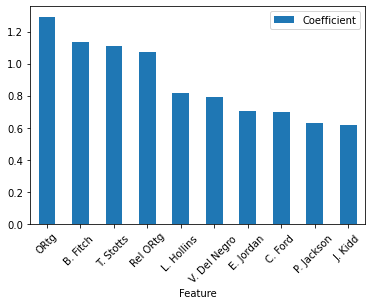

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
keys = sorted_coef_dict.keys()
values = sorted_coef_dict.values()

coef_df = pd.DataFrame({'Feature': sorted_coef_dict.keys(),
                        'Coefficient': sorted_coef_dict.values()})


coef_df.sort_values(by='Coefficient', ascending=False).head(10).set_index("Feature").plot(kind="bar", rot=45)
plt.show()
                        


<AxesSubplot:xlabel='Feature'>

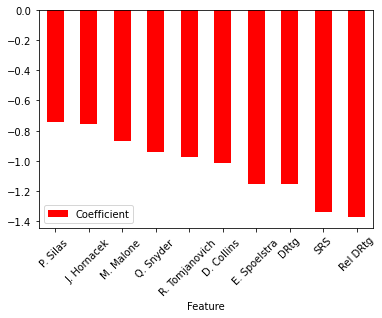

In [42]:
coef_df.sort_values(by="Coefficient", ascending=False).tail(10).set_index("Feature").plot(color = 'red', kind="bar", rot=45)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
y_test_true = y_test
y_test_pred = logreg.predict(X_test)

In [45]:
 confusion_matrix(y_test_true, y_test_pred)

array([[75,  6],
       [ 5, 90]], dtype=int64)

In [46]:
from sklearn.metrics import plot_confusion_matrix

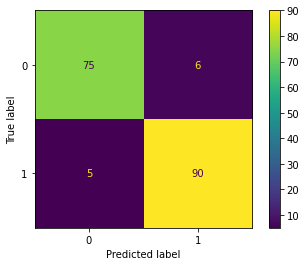

In [47]:
plot_confusion_matrix(logreg, X_test, y_test)

Take Aways: 
- The initial model performed incredibly well. 
- We know that teams with better players will win more. That is not the goal of this model. I want to find out which stats are most predictive of winning. That is why I must continue modeling and digging into the features. 

### Additional Data Cleaning

I will clean up the 'Team/Year' column before going into feature engineering. I will be splitting it into 2 columns('Team' and 'Year'). I will then drop 'Team/Year' to avoid redundancy. 

In [48]:
# need to split the Team/Year column to 'Team', 'Year'
outcomes_df[['Team', 'Year']] = outcomes_df['Team/Year'].str.split('/', expand=True)
outcomes_df

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld,Playoffs,Team,Year
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,0,0,0,0,0,0,0,0,NYK,2020
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,0,0,0,0,0,0,0,0,NYK,2019
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,0,0,0,0,0,0,0,0,NYK,2018
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,0,0,0,0,0,0,0,0,NYK,2017
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,0,0,0,0,0,0,0,0,NYK,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,0,0,0,0,0,0,0,0,NOH,2009
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,0,0,0,0,0,0,0,0,NOH,2008
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,0,0,0,0,0,0,0,0,NOH,2005
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,0,0,0,0,0,0,0,1,NOH,2004


In [49]:
# move the 'team' and 'year' columns, to the from then drop 'team/year' 

# first get the columns to move 
columns_to_move = pd.DataFrame()
col_names= ['Team', 'Year']
for name in col_names:
    column_to_move = outcomes_df.pop(name)
    columns_to_move = pd.concat([columns_to_move, column_to_move], axis = 1)

columns_to_move

,Team,Year
0,NYK,2020
1,NYK,2019
2,NYK,2018
3,NYK,2017
4,NYK,2016
...,...,...
871,NOH,2009
872,NOH,2008
873,NOH,2005
874,NOH,2004


In [50]:
# now concat dataframe together
outcomes_df = pd.concat([columns_to_move, outcomes_df], axis =1)
outcomes_df

,Team,Year,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,...,T. Corbin,T. Floyd,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld,Playoffs
0,NYK,2020,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,...,0,0,0,0,0,0,0,0,0,0
1,NYK,2019,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,...,0,0,0,0,0,0,0,0,0,0
2,NYK,2018,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,...,0,0,0,0,0,0,0,0,0,0
3,NYK,2017,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,...,0,0,0,0,0,0,0,0,0,0
4,NYK,2016,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH,2009,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,...,0,0,0,0,0,0,0,0,0,0
872,NOH,2008,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,...,0,0,0,0,0,0,0,0,0,0
873,NOH,2005,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,...,0,0,0,0,0,0,0,0,0,0
874,NOH,2004,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,...,0,1,0,0,0,0,0,0,0,1


In [51]:
# dropping 'Team/Year' column 
outcomes_df.drop('Team/Year', axis = 1, inplace = True)

In [52]:
outcomes_df

,Team,Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,...,T. Corbin,T. Floyd,T. Jenkins,T. Lue,T. Porter,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld,Playoffs
0,NYK,2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,...,0,0,0,0,0,0,0,0,0,0
1,NYK,2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,...,0,0,0,0,0,0,0,0,0,0
2,NYK,2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,...,0,0,0,0,0,0,0,0,0,0
3,NYK,2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,...,0,0,0,0,0,0,0,0,0,0
4,NYK,2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH,2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,...,0,0,0,0,0,0,0,0,0,0
872,NOH,2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,...,0,0,0,0,0,0,0,0,0,0
873,NOH,2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,...,0,0,0,0,0,0,0,0,0,0
874,NOH,2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,...,0,1,0,0,0,0,0,0,0,1


# Feature Engineering

### 'Division'

Creating a new column called 'Division'. I will then label encode. Each row will have a label 0-5. 

In [53]:
# feature engineering - making division column 
# first need no create dict to map out teams and divisions

division_dict = {'NYK':'Atlantic_Division', 'TOR': 'Atlantic_Division', 'BOS': 'Atlantic_Division', 'BRK': 'Atlantic_Division',
                 'NJN': 'Atlantic_Division', 'PHI': 'Atlantic_Division', 'MIL': 'Central_Division', 'IND':'Central_Division',
                 'CHI': 'Central_Division', 'DET': 'Central_Division', 'CLE': 'Central_Division', 
                 'CHO': 'Southeast_Division','CHA': 'Southeast_Division', 'CHH': 'Southeast_Division',
                 'MIA': 'Southeast_Division', 'ORL': 'Southeast_Division', 'WAS': 'Southeast_Division','WSB': 'Southeast_Division',
                  'ATL': 'Southeast_Division', 'DEN': 'Northwest_Division','OKC': 'Northwest_Division', 
                'SEA': 'Northwest_Division', 'UTA': 'Northwest_Division', 'POR': 'Northwest_Division', 'MIN':'Northwest_Division',
                 'LAL': 'Pacific_Division', 'LAC': 'Pacific_Division', 'PHO': 'Pacific_Division', 
                'SAC': 'Pacific_Division', 'GSW':'Pacific_Division', 
                 'HOU':'Southwest_Division', 'DAL': 'Southwest_Division', 'MEM': 'Southwest_Division','VAN': 'Southwest_Division',
                 'SAS': 'Southwest_Division','NOP': 'Southwest_Division','NOK': 'Southwest_Division','NOH': 'Southwest_Division'}


In [54]:
# creating new column for division 
outcomes_df['Division'] = outcomes_df['Team'].map(division_dict)

In [55]:
# label encode the divisions 
outcomes_df['Division'] = outcomes_df['Division'].astype('category')
outcomes_df.dtypes

Team               object
Year               object
player1_PER       float64
player2_PER       float64
player3_PER       float64
                   ...   
T. Thibodeau        uint8
V. Del Negro        uint8
W. Unseld           uint8
Playoffs            int32
Division         category
Length: 187, dtype: object

In [56]:
outcomes_df['Division'] = outcomes_df['Division'].cat.codes

In [90]:
# checking results 
outcomes_df

,Team,Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,...,T. Stotts,T. Thibodeau,V. Del Negro,W. Unseld,Division,AVG_PER,AVG_TSP,Location,Playoffs,Conference
0,NYK,2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,...,0,0,0,0,0,14.6125,0.536500,"New York, NY",0,0
1,NYK,2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,...,0,0,0,0,0,13.4250,0.547125,"New York, NY",0,0
2,NYK,2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,...,0,0,0,0,0,16.0125,0.546625,"New York, NY",0,0
3,NYK,2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,...,0,0,0,0,0,16.1750,0.542875,"New York, NY",0,0
4,NYK,2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,...,0,0,0,0,0,14.7625,0.540125,"New York, NY",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH,2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,...,0,0,0,0,5,14.7250,0.550500,"New Orleans, LA",0,1
872,NOH,2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,...,0,0,0,0,5,15.7750,0.539125,"New Orleans, LA",0,1
873,NOH,2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,...,0,0,0,0,5,13.6500,0.520500,"New Orleans, LA",0,1
874,NOH,2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,...,0,0,0,0,5,14.6250,0.507875,"New Orleans, LA",1,1


### 'Conference'

In [70]:
# creating the conference dict that I will use to map the divisions to conference 
conference_dict = {0: 'Eastern Conference', 1: 'Eastern Conference', 2: 'Eastern Conference', 
                   3: 'Western Conference', 4: 'Western Conference', 5: 'Western Conference'}

In [72]:
# creating the conference column 
outcomes_df['Conference'] = outcomes_df['Division'].map(conference_dict)

In [73]:
# label encode the 2 conferences  
outcomes_df['Conference'] = outcomes_df['Conference'].astype('category')

In [74]:
outcomes_df['Conference'] = outcomes_df['Conference'].cat.codes

### 'AVG_PER'

Creating a columns called 'AVG_PER'. This will be the average of each teams PER from all 8 players. 

In [58]:
# creating AVG_PER column - adding up all 8 PER, then divide by 8 
outcomes_df['AVG_PER'] = (outcomes_df['player1_PER'] + outcomes_df['player2_PER'] + outcomes_df['player3_PER'] +
                        outcomes_df['player4_PER'] + outcomes_df['player5_PER'] + outcomes_df['player6_PER'] +
                        outcomes_df['player7_PER'] + outcomes_df['player8_PER']) / 8

### 'AVG_TSP'

Creating a column for the average TSP for each team's 8 players. 

In [59]:
# creating AVG_TSP column - adding up all 8 TSP, then divide by 8 
outcomes_df['AVG_TSP'] = (outcomes_df['player1_TSP'] + outcomes_df['player2_TSP'] + outcomes_df['player3_TSP'] +
                        outcomes_df['player4_TSP'] + outcomes_df['player5_TSP'] + outcomes_df['player6_TSP'] +
                        outcomes_df['player7_TSP'] + outcomes_df['player8_TSP']) / 8

### 'Location'

Creating a column that will display location for each team. 

In [60]:
# creating a dictionary I will use to map the City/State to the correct team
location_dict = {'NYK':'New York, NY', 'TOR': 'Toronto, ON', 'BOS': 'Boston, MA', 'BRK': 'Brooklyn, NY',
                 'NJN': 'East Rutherford, NJ', 'PHI': 'Philadelphia, PA', 'MIL': 'Milwaukee, WI', 'IND':'Indianapolis, IN',
                 'CHI': 'Chicago, IL', 'DET': 'Detroit, MI', 'CLE': 'Cleveland, OH', 
                 'CHO': 'Charlotte, NC','CHA': 'Charlotte, NC', 'CHH': 'Charlotte, NC',
                 'MIA': 'Miami, FL', 'ORL': 'Orlando, FL', 'WAS': 'Washington, D.C.','WSB': 'Washington, D.C.',
                  'ATL': 'Atlanta, GA', 'DEN': 'Denver, CO','OKC': 'Oklahoma City, OK', 
                'SEA': 'Seattle, WA', 'UTA': 'Salt Lake City, Utah', 'POR': 'Portland, OR', 'MIN':'Minnesota, MN',
                 'LAL': 'Los Angeles, CA', 'LAC': 'Los Angeles, CA', 'PHO': 'Phoenix, AZ', 
                'SAC': 'Sacramento, CA', 'GSW':'Oakland, CA', 
                 'HOU':'Houston, TX', 'DAL': 'Dallas, TX', 'MEM': 'Memphis, TN','VAN': 'Vancouver, BC',
                 'SAS': 'San Antonio, TX','NOP': 'New Orleans, LA','NOK': 'New Orleans, LA','NOH': 'New Orleans, LA'}

In [61]:
# map the cities in to creat the new columns 
outcomes_df['Location'] = outcomes_df['Team'].map(location_dict)

In [62]:
# dropping playoffs and moving it to the back end of dataframe again 
outcomes_df = outcomes_df.drop(columns = ['Playoffs']).assign(Playoffs=outcomes_df['Playoffs'])

# Writing dataframes to CSV files

Adding the new features to my dataframe that I will use for tableau. (the tableau dataframe does not containt the coaches)

I will write 'outcomes_df' and 'tableau_df' to CSV. 

In [63]:
# writing outcomes_df to csv
outcomes_df.to_csv(r'C:/Users/ifmur/OneDrive/Desktop/BrainStation/Notebooks/data/outcomes_df.csv')

In [64]:
# getting the features I want to add to the tableau_df
new_features_df = pd.DataFrame([outcomes_df['Division'], outcomes_df['AVG_PER'], outcomes_df['AVG_TSP'],outcomes_df['Location']])
new_features_df = new_features_df.transpose()

In [65]:
# adding the new featured to the tableau_df
tableau_df = pd.concat([tableau_df, new_features_df], axis = 1)

In [66]:
# splitting and dropping 'Team/Year' for tableau_df
tableau_df[['Team', 'Year']] = tableau_df['Team/Year'].str.split('/', expand=True)

In [67]:
# checking to see if it worked 
tableau_df

,Team/Year,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,...,DRtg,Rel ORtg,Rel DRtg,Playoffs,Division,AVG_PER,AVG_TSP,Location,Team,Year
0,NYK/2020,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,...,113.0,-4.1,2.4,0,0,14.6125,0.5365,"New York, NY",NYK,2020
1,NYK/2019,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,...,113.7,-5.9,3.3,0,0,13.425,0.547125,"New York, NY",NYK,2019
2,NYK/2018,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,...,110.7,-1.5,2.1,0,0,16.0125,0.546625,"New York, NY",NYK,2018
3,NYK/2017,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,...,111.5,-1.1,2.7,0,0,16.175,0.542875,"New York, NY",NYK,2017
4,NYK/2016,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,...,107.6,-1.8,1.2,0,0,14.7625,0.540125,"New York, NY",NYK,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NOH/2009,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,...,106.5,-1.7,0.0,0,5,14.725,0.5505,"New Orleans, LA",NOH,2009
872,NOH/2008,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,...,106.8,-2.5,0.6,0,5,15.775,0.539125,"New Orleans, LA",NOH,2008
873,NOH/2005,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,...,107.7,-6.4,1.6,0,5,13.65,0.5205,"New Orleans, LA",NOH,2005
874,NOH/2004,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,...,102.4,-0.6,-0.5,1,5,14.625,0.507875,"New Orleans, LA",NOH,2004


In [68]:
# putting 'Playoffs' at the end of the dataframe
tableau_df = tableau_df.drop(columns = ['Playoffs']).assign(Playoffs = tableau_df['Playoffs'])

In [86]:
# splitting the Team/Year column for the tableau_df so I can use these columns in my EDA in tableau 
tableau_df[['Team', 'Year']] = tableau_df['Team/Year'].str.split('/', expand=True)
tableau_df.drop('Team/Year', axis =1, inplace = True)

In [87]:
tableau_df.to_csv(r'C:/Users/ifmur/OneDrive/Desktop/BrainStation/Notebooks/data/tableau_df.csv')

In [88]:
tableau_df

,player1_PER,player2_PER,player3_PER,player4_PER,player5_PER,player6_PER,player7_PER,player8_PER,player9_PER,player10_PER,...,DRtg,Rel ORtg,Rel DRtg,Division,AVG_PER,AVG_TSP,Location,Team,Year,Playoffs
0,17.5,10.7,23.5,14.6,16.5,16.0,9.8,8.3,16.1,10.9,...,113.0,-4.1,2.4,0,14.6125,0.5365,"New York, NY",NYK,2020,0
1,8.7,10.8,13.9,14.6,14.4,12.2,22.0,10.8,21.8,6.0,...,113.7,-5.9,3.3,0,13.425,0.547125,"New York, NY",NYK,2019,0
2,13.0,14.4,24.0,7.0,17.8,20.4,11.5,20.0,6.3,9.9,...,110.7,-1.5,2.1,0,16.0125,0.546625,"New York, NY",NYK,2018,0
3,17.9,12.2,17.4,17.0,12.7,12.7,19.0,20.5,12.4,15.2,...,111.5,-1.1,2.7,0,16.175,0.542875,"New York, NY",NYK,2017,0
4,20.3,10.9,17.6,17.7,11.7,12.3,17.2,10.4,11.2,11.1,...,107.6,-1.8,1.2,0,14.7625,0.540125,"New York, NY",NYK,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,30.0,18.9,11.8,10.8,12.5,13.4,10.7,9.7,8.8,12.6,...,106.5,-1.7,0.0,5,14.725,0.5505,"New Orleans, LA",NOH,2009,0
872,28.3,19.9,17.5,15.7,11.2,11.9,12.9,8.8,7.7,9.9,...,106.8,-2.5,0.6,5,15.775,0.539125,"New Orleans, LA",NOH,2008,0
873,15.5,15.0,14.5,10.9,18.5,10.9,11.7,12.2,7.9,7.1,...,107.7,-6.4,1.6,5,13.65,0.5205,"New Orleans, LA",NOH,2005,0
874,16.5,15.7,20.7,15.6,12.6,9.7,10.0,16.2,15.9,11.8,...,102.4,-0.6,-0.5,5,14.625,0.507875,"New Orleans, LA",NOH,2004,1
